<a href="https://colab.research.google.com/github/deepak-karkala/articles/blob/master/eda_zomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import matplotlib
font = {'weight' : 'normal',
        'size'   : 10}
matplotlib.rc('font', **font)

In [2]:
from google.colab import drive

from pathlib import Path
import zipfile
import urllib.request

path_str = "/content/drive/MyDrive/ColabNotebooks/data/"
#dfw = pd.read_csv(Path(path_str + "zomato_worldwide.csv"), encoding='latin-1')
file_str = Path(path_str + "zomato_bangalore.csv")

def load_data():
    if file_str.is_file():
        return pd.read_csv(file_str)

    path_to_zip_file = Path(path_str + "zomato.zip")
    if not path_to_zip_file.is_file():
        drive.mount('/content/drive')
        with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
            zip_ref.extractall(path= path_str)
    return pd.read_csv(Path(path_str + "zomato_bangalore.csv"))

df_orig = load_data()
dfb = df_orig.copy()
dfb.head(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

### Data Cleaning (Format price and ratings from str to float)

In [4]:
dfb.rename(columns={"approx_cost(for two people)": "price"}, inplace=True)
dfb["price"] = dfb["price"].map(lambda x: str(x).split("/")[0].replace(",","")).astype(float)
dfb.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,price,reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [ ]:
dfb.rename(columns={"rate": "ratings"}, inplace=True)

dfb.drop(dfb[dfb["ratings"] == "NEW"].index, inplace=True)
dfb.drop(dfb[dfb["ratings"] == "-"].index, inplace=True)

dfb["ratings"] = dfb["ratings"].map(lambda x: str(x).split("/")[0]).astype(float)
dfb.dropna(subset=["ratings"], inplace=True)
dfb.head(2)

,url,address,name,online_order,book_table,ratings,votes,phone,location,rest_type,dish_liked,cuisines,price,reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [ ]:
dfb.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'ratings',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'price', 'reviews_list', 'menu_item', 'listed_in(type)',
       'listed_in(city)'],
      dtype='object')

In [ ]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41665 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              41665 non-null  object 
 1   address          41665 non-null  object 
 2   name             41665 non-null  object 
 3   online_order     41665 non-null  object 
 4   book_table       41665 non-null  object 
 5   ratings          41665 non-null  float64
 6   votes            41665 non-null  int64  
 7   phone            40851 non-null  object 
 8   location         41665 non-null  object 
 9   rest_type        41516 non-null  object 
 10  dish_liked       23462 non-null  object 
 11  cuisines         41654 non-null  object 
 12  price            41418 non-null  float64
 13  reviews_list     41665 non-null  object 
 14  menu_item        41665 non-null  object 
 15  listed_in(type)  41665 non-null  object 
 16  listed_in(city)  41665 non-null  object 
dtypes: float64(2), in

## Exploratory Data Analysis (EDA)

### Restaurant Type

In [ ]:
dfb["listed_in(type)"].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

<Axes: xlabel='listed_in(type)'>

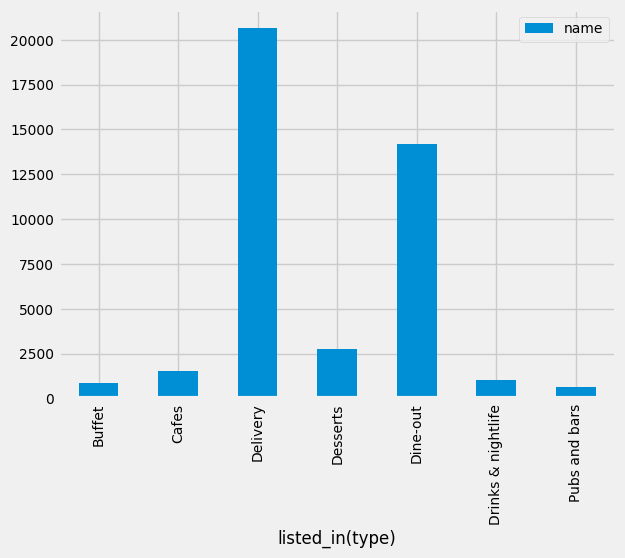

In [ ]:
dfb[["listed_in(type)", "name"]].groupby("listed_in(type)").count().plot(kind="bar")

### Number of restaurants by area

<Axes: xlabel='listed_in(city)'>

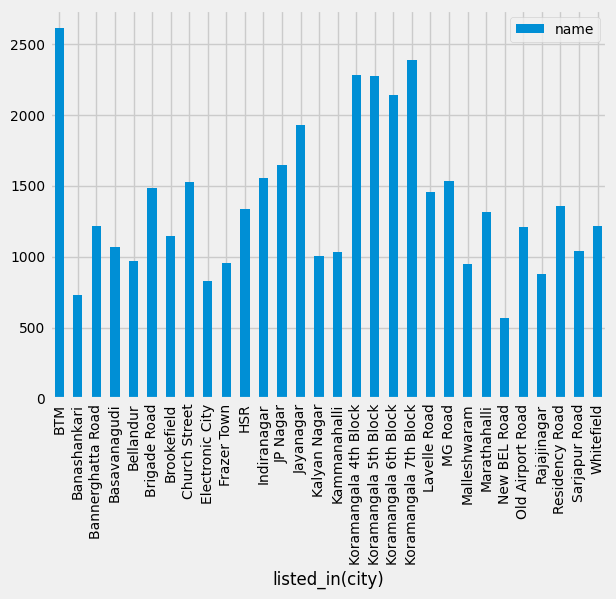

In [ ]:
dfb[["listed_in(city)", "name"]].groupby("listed_in(city)").count().plot(kind="bar")

### Price by area

<Axes: ylabel='listed_in(city)'>

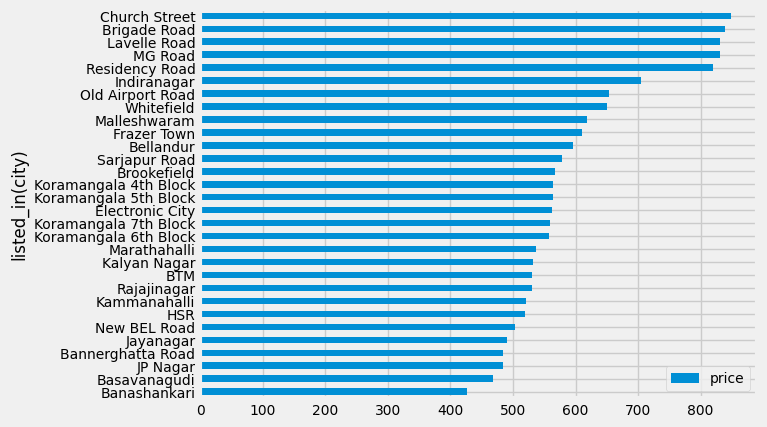

In [ ]:
dfb[["listed_in(city)", "price"]].groupby("listed_in(city)").mean().sort_values(by="price", ascending=True).plot(kind="barh")

### Restuarants with most number of ratings

In [ ]:
dfb.sort_values(by="votes", ascending=False)[["name", "votes", "ratings", "listed_in(city)"]].head(10)

,name,votes,ratings,listed_in(city)
49627,Byg Brewski Brewing Company,16832,4.9,Sarjapur Road
49170,Byg Brewski Brewing Company,16832,4.9,Sarjapur Road
50059,Byg Brewski Brewing Company,16832,4.9,Sarjapur Road
4944,Byg Brewski Brewing Company,16345,4.9,Bellandur
4801,Byg Brewski Brewing Company,16345,4.9,Bellandur
3921,Byg Brewski Brewing Company,16345,4.9,Bellandur
18643,Toit,14956,4.7,Indiranagar
19268,Toit,14956,4.7,Indiranagar
36668,Truffles,14726,4.7,Koramangala 7th Block
36000,Truffles,14723,4.7,Koramangala 7th Block


In [ ]:
dfb.sort_values(by="votes", ascending=False).drop_duplicates(["name"])[["name", "votes", "ratings", "listed_in(city)"]].head(10)

,name,votes,ratings,listed_in(city)
49627,Byg Brewski Brewing Company,16832,4.9,Sarjapur Road
18643,Toit,14956,4.7,Indiranagar
36668,Truffles,14726,4.7,Koramangala 7th Block
40506,AB's - Absolute Barbecues,12121,4.8,Marathahalli
37606,The Black Pearl,10550,4.7,Koramangala 7th Block
46095,Big Pitcher,9300,4.6,Old Airport Road
36424,Onesta,9085,4.4,Koramangala 7th Block
48163,Arbor Brewing Company,8419,4.5,Residency Road
45837,Empire Restaurant,8304,4.1,Old Airport Road
37611,Prost Brew Pub,7871,4.5,Koramangala 7th Block


### Worst rated restaurants

In [ ]:
dfb.sort_values(by="ratings", ascending=True).drop_duplicates(["name"])[["name", "votes", "ratings", "listed_in(city)"]].head(10)

,name,votes,ratings,listed_in(city)
43489,Alibi - Maya International Hotel,225,1.8,MG Road
40698,Bhagini,259,2.0,Marathahalli
13259,Fusion Lounge,396,2.0,Church Street
7512,Decker's Lane,242,2.1,Brookefield
49964,Mast Kalandar,338,2.1,Sarjapur Road
41843,Ammi's Biryani,342,2.1,Marathahalli
35836,Midnight Hunger Solutions 24/7,253,2.1,Koramangala 7th Block
41255,Bageecha,479,2.1,Marathahalli
49750,Madurai Idly Shop,193,2.1,Sarjapur Road
47714,Mamma Mexicana,409,2.2,Residency Road


## Advanced Features

### Getting restaurant location coordinates using address

In [ ]:
from geopy.geocoders import ArcGIS
geolocator_arcgis = ArcGIS()

address = dfb.iloc[0]["address"]
location = geolocator_arcgis.geocode(address)
print(address)
print(location.latitude, location.longitude)

942, 21st Main Road, 2nd Stage, Banashankari, Bangalore
12.926225994214 77.564737991227


In [ ]:
dftop = dfb.copy()
dftop = dftop.sort_values(by="votes", ascending=False).drop_duplicates(["name"])[["name", "address", "price", "votes", "ratings", "listed_in(city)"]].head(10)
dftop.reset_index(inplace = True)
del dftop["index"]
dftop

,name,address,price,votes,ratings,listed_in(city)
0,Byg Brewski Brewing Company,"Behind MK Retail, Sarjapur Road, Bangalore",1600.0,16832,4.9,Sarjapur Road
1,Toit,"298, Namma Metro Pillar 62, 100 Feet Road, Ind...",1500.0,14956,4.7,Indiranagar
2,Truffles,"28, 4th 'B' Cross, Koramangala 5th Block, Bang...",900.0,14726,4.7,Koramangala 7th Block
3,AB's - Absolute Barbecues,"90/4, 3rd Floor, Outer Ring Road, Munnekollaly...",1600.0,12121,4.8,Marathahalli
4,The Black Pearl,"105, 1st A Cross Road, Jyothi Nivas College Ro...",1400.0,10550,4.7,Koramangala 7th Block
5,Big Pitcher,"LR Arcade,4121, Old Airport Road, Bangalore",1800.0,9300,4.6,Old Airport Road
6,Onesta,"562, 8th Main, Koramangala 4th Block, Bangalore",600.0,9085,4.4,Koramangala 7th Block
7,Arbor Brewing Company,"8, 3rd Floor, Allied Grande Plaza, Diagonally ...",2000.0,8419,4.5,Residency Road
8,Empire Restaurant,"Next to BSNL, HAL 2nd Stage, 80 Feet Road, Ind...",750.0,8304,4.1,Old Airport Road
9,Prost Brew Pub,"749, 10th Main, 80 Feet Road, Koramangala 4th ...",1800.0,7871,4.5,Koramangala 7th Block


In [ ]:
from geopy.geocoders import ArcGIS
geolocator_arcgis = ArcGIS()

latitudes = []
longitudes = []

for i in range(len(dftop)):
#for i in  [randint(0, 100) for p in range(0, len(dftop))]:
  location = geolocator_arcgis.geocode(dftop.iloc[i]["address"])
  latitudes.append(location.latitude)
  longitudes.append(location.longitude)

dftop["latitude"] = latitudes
dftop["longitude"] = longitudes
dftop

,name,address,price,votes,ratings,listed_in(city),latitude,longitude
0,Byg Brewski Brewing Company,"Behind MK Retail, Sarjapur Road, Bangalore",1600.0,16832,4.9,Sarjapur Road,12.885523,77.745416
1,Toit,"298, Namma Metro Pillar 62, 100 Feet Road, Ind...",1500.0,14956,4.7,Indiranagar,12.960477,77.642887
2,Truffles,"28, 4th 'B' Cross, Koramangala 5th Block, Bang...",900.0,14726,4.7,Koramangala 7th Block,12.933547,77.634700
3,AB's - Absolute Barbecues,"90/4, 3rd Floor, Outer Ring Road, Munnekollaly...",1600.0,12121,4.8,Marathahalli,12.957909,77.701181
4,The Black Pearl,"105, 1st A Cross Road, Jyothi Nivas College Ro...",1400.0,10550,4.7,Koramangala 7th Block,12.944628,77.616857
5,Big Pitcher,"LR Arcade,4121, Old Airport Road, Bangalore",1800.0,9300,4.6,Old Airport Road,12.957217,77.674123
6,Onesta,"562, 8th Main, Koramangala 4th Block, Bangalore",600.0,9085,4.4,Koramangala 7th Block,12.933698,77.627094
7,Arbor Brewing Company,"8, 3rd Floor, Allied Grande Plaza, Diagonally ...",2000.0,8419,4.5,Residency Road,12.970292,77.610811
8,Empire Restaurant,"Next to BSNL, HAL 2nd Stage, 80 Feet Road, Ind...",750.0,8304,4.1,Old Airport Road,12.988158,77.537486
9,Prost Brew Pub,"749, 10th Main, 80 Feet Road, Koramangala 4th ...",1800.0,7871,4.5,Koramangala 7th Block,12.934409,77.612303


In [ ]:
import plotly.express as px
color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(dftop,
                        lat="latitude",
                        lon="longitude",
                        hover_name="address",
                        hover_data=["name", "votes"],
                        color="price",
                        color_continuous_scale="YlOrRd",
                        size="votes",
                        zoom=8,
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Web scraping (Getting data from restaurant webpage using URL)

In [ ]:
import requests
from bs4 import BeautifulSoup

page = requests.get("https://toscano.world/toscano-banglore/")
soup = BeautifulSoup(page.content, "html.parser")

In [ ]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en-US">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport">
   <title>
    Toscano Banglore – Toscano
   </title>
   <meta content="max-image-preview:large" name="robots"/>
   <link href="//maps.google.com" rel="dns-prefetch"/>
   <link href="//fonts.googleapis.com" rel="dns-prefetch"/>
   <link href="https://sp-ao.shortpixel.ai" rel="preconnect"/>
   <link href="https://toscano.world/feed/" rel="alternate" title="Toscano » Feed" type="application/rss+xml"/>
   <link href="https://toscano.world/comments/feed/" rel="alternate" title="Toscano » Comments Feed" type="application/rss+xml"/>
   <script defer="" src="data:text/javascript;base64,CndpbmRvdy5fd3BlbW9qaVNldHRpbmdzID0geyJiYXNlVXJsIjoiaHR0cHM6XC9cL3Mudy5vcmdcL2ltYWdlc1wvY29yZVwvZW1vamlcLzE1LjAuM1wvNzJ4NzJcLyIsImV4dCI6Ii5wbmciLCJzdmdVcmwiOiJodHRwczpcL1wvcy53Lm9yZ1wvaW1hZ2VzXC9jb3JlXC9lbW9qaVwvMTUuMC4zXC9zdmdcLyIsInN2Z0V4dCI6Ii5zdmciLCJzb3VyY2UiOnsiY29

In [ ]:
soup.find_all("h2", class_="elementor-heading-title")

[<h2 class="elementor-heading-title elementor-size-default">Toscano Bangalore</h2>,
 <h2 class="elementor-heading-title elementor-size-default"> UB CITY</h2>,
 <h2 class="elementor-heading-title elementor-size-default"> ORION MALL</h2>,
 <h2 class="elementor-heading-title elementor-size-default">JAYANAGAR</h2>,
 <h2 class="elementor-heading-title elementor-size-default">WHITEFIELD</h2>,
 <h2 class="elementor-heading-title elementor-size-default">BHARTIYA MALL</h2>,
 <h2 class="elementor-heading-title elementor-size-default">NEXUS KORAMANGALA</h2>,
 <h2 class="elementor-heading-title elementor-size-default">COLLAGE BY TOSCANO</h2>,
 <h2 class="elementor-heading-title elementor-size-default"> MUSEUM ROAD</h2>,
 <h2 class="elementor-heading-title elementor-size-default">NEXUS SHANTI NIKETAN</h2>,
 <h2 class="elementor-heading-title elementor-size-default">MANYATA TECH PARK</h2>]

In [ ]:
page = requests.get("https://toscano.world/menu/")
soup = BeautifulSoup(page.content, "html.parser")
print(soup.prettify())

<!DOCTYPE html>
<html lang="en-US">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport">
   <title>
    Menu – Toscano
   </title>
   <meta content="max-image-preview:large" name="robots"/>
   <link href="//maps.google.com" rel="dns-prefetch"/>
   <link href="//fonts.googleapis.com" rel="dns-prefetch"/>
   <link href="https://sp-ao.shortpixel.ai" rel="preconnect"/>
   <link href="https://toscano.world/feed/" rel="alternate" title="Toscano » Feed" type="application/rss+xml"/>
   <link href="https://toscano.world/comments/feed/" rel="alternate" title="Toscano » Comments Feed" type="application/rss+xml"/>
   <script defer="" src="data:text/javascript;base64,CndpbmRvdy5fd3BlbW9qaVNldHRpbmdzID0geyJiYXNlVXJsIjoiaHR0cHM6XC9cL3Mudy5vcmdcL2ltYWdlc1wvY29yZVwvZW1vamlcLzE1LjAuM1wvNzJ4NzJcLyIsImV4dCI6Ii5wbmciLCJzdmdVcmwiOiJodHRwczpcL1wvcy53Lm9yZ1wvaW1hZ2VzXC9jb3JlXC9lbW9qaVwvMTUuMC4zXC9zdmdcLyIsInN2Z0V4dCI6Ii5zdmciLCJzb3VyY2UiOnsiY29uY2F0ZW1vamk

In [25]:
dfb.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,price,reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


### Plotting histogram (distributions) of features

array([[<Axes: title={'center': 'online_order'}>,
        <Axes: title={'center': 'book_table'}>,
        <Axes: title={'center': 'rate'}>],
       [<Axes: title={'center': 'votes'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'listed_in(type)'}>],
       [<Axes: title={'center': 'listed_in(city)'}>, <Axes: >, <Axes: >]],
      dtype=object)

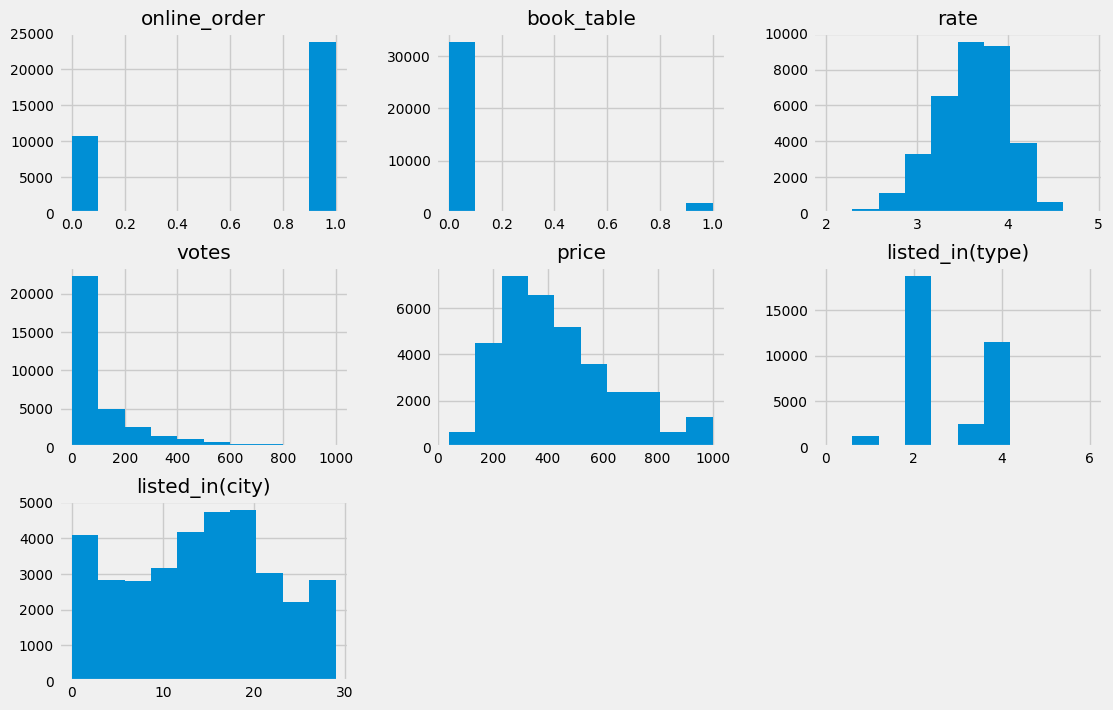

In [32]:
from sklearn.preprocessing import LabelEncoder

dfb.drop(dfb[dfb["rate"] == "NEW"].index, inplace=True)
dfb.drop(dfb[dfb["rate"] == "-"].index, inplace=True)
dfb["rate"] = dfb["rate"].map(lambda x: str(x).split("/")[0]).astype(float)
dfb.dropna(subset=["rate"], inplace=True)

dfb["price"] = dfb["price"].map(lambda x: str(x).split("/")[0].replace(",","")).astype(float)

for col in ["online_order","book_table", "listed_in(type)", "listed_in(city)"]:
    dfb[col] = LabelEncoder().fit_transform(dfb[col])

dfb = dfb[dfb["price"] <= 1000]

dfb.hist(bins = 10, figsize=(12, 8))

### Scatter matrix (to see how two features are related)

array([[<Axes: xlabel='online_order', ylabel='online_order'>,
        <Axes: xlabel='listed_in(type)', ylabel='online_order'>,
        <Axes: xlabel='rate', ylabel='online_order'>,
        <Axes: xlabel='price', ylabel='online_order'>,
        <Axes: xlabel='listed_in(city)', ylabel='online_order'>],
       [<Axes: xlabel='online_order', ylabel='listed_in(type)'>,
        <Axes: xlabel='listed_in(type)', ylabel='listed_in(type)'>,
        <Axes: xlabel='rate', ylabel='listed_in(type)'>,
        <Axes: xlabel='price', ylabel='listed_in(type)'>,
        <Axes: xlabel='listed_in(city)', ylabel='listed_in(type)'>],
       [<Axes: xlabel='online_order', ylabel='rate'>,
        <Axes: xlabel='listed_in(type)', ylabel='rate'>,
        <Axes: xlabel='rate', ylabel='rate'>,
        <Axes: xlabel='price', ylabel='rate'>,
        <Axes: xlabel='listed_in(city)', ylabel='rate'>],
       [<Axes: xlabel='online_order', ylabel='price'>,
        <Axes: xlabel='listed_in(type)', ylabel='price'>,
      

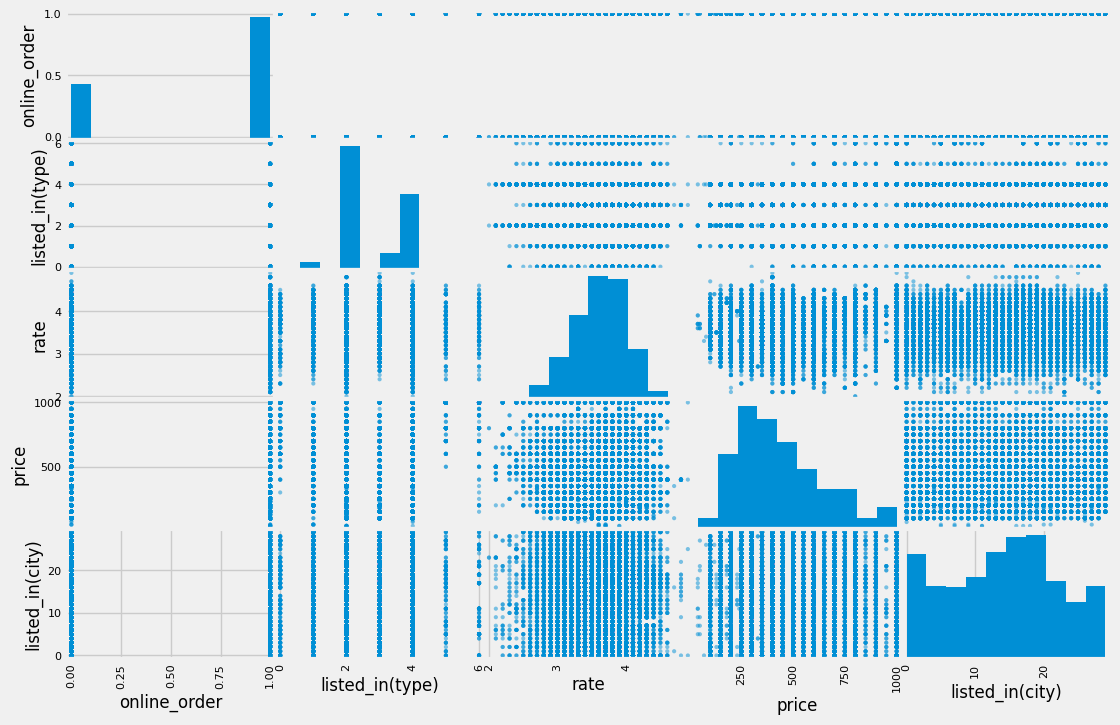

In [36]:
from pandas.plotting import scatter_matrix

attributes = ["online_order", "listed_in(type)", "rate", "price", "listed_in(city)"]
scatter_matrix(dfb[attributes], figsize=(12, 8))

# Data pre-processing for Machine Learning

In [16]:
df = df_orig.copy()
df.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


### Dropping unwanted columns

In [17]:
columns_to_drop = ["url", "address", "rest_type", "phone", "location", "menu_item", "dish_liked", "cuisines", "reviews_list"]
df.drop(columns_to_drop, axis=1, inplace=True)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,600,Buffet,Banashankari


### Renaming columns

In [18]:
df.rename(columns={"listed_in(city)": "area", "rate": "ratings",
                   "approx_cost(for two people)": "price", "listed_in(type)": "type"}, inplace=True)
df.head()

,name,online_order,book_table,ratings,votes,price,type,area
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,600,Buffet,Banashankari


### Dropping new restaurants for which there are no ratings yet

In [20]:
#invalid_ratings_tokens = ["NEW", "-"]
#df = df[~df["ratings"].isin(invalid_ratings_tokens)]
num_restaurants_total = df.shape[0]
df.drop(df[df["ratings"] == "NEW"].index, inplace=True)
df.drop(df[df["ratings"] == "-"].index, inplace=True)
num_restaurants_with_ratings = df.shape[0]

print(f"Total Number of restaurants: {num_restaurants_total}")
print(f"Number of restaurants with ratings: {num_restaurants_with_ratings}")

Total Number of restaurants: 51717
Number of restaurants with ratings: 49440


In [19]:
df["price"].astype(float)

ValueError: could not convert string to float: '1,200'

## Extract ratings and price as float values

In [21]:
df["ratings"] = df["ratings"].map(lambda x: str(x).split("/")[0]).astype(float)
df.dropna(subset=["ratings"], inplace=True)

df["price"] = df["price"].map(lambda x: str(x).split("/")[0].replace(",","")).astype(float)
df.head(2)

,name,online_order,book_table,ratings,votes,price,type,area
0,Jalsa,Yes,Yes,4.1,775,800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,800.0,Buffet,Banashankari


## Let us try to predict prices categorised into 6 categories
#### < 200, 200-400, 400-600, 600-800, 800-2000, 2000-6000

In [22]:
df["label_price"] = {}
df["label_price"] = pd.cut(df["price"], bins=[0, 200, 400, 600, 800, 2000, 6000], labels=[0, 1, 2, 3, 4, 5])
df.head(2)

,name,online_order,book_table,ratings,votes,price,type,area,label_price
0,Jalsa,Yes,Yes,4.1,775,800.0,Buffet,Banashankari,3
1,Spice Elephant,Yes,No,4.1,787,800.0,Buffet,Banashankari,3


### Dropping price column

In [ ]:
dfp = df.copy()
dfp.drop(columns=["name", "price"], inplace=True)
dfp.dropna(subset = "label_price", inplace=True)

dfp.head(2)

,online_order,book_table,ratings,votes,type,area,label_price
0,1,1,0.907025,0.480099,0,1,3
1,1,0,0.907025,0.493708,0,1,3


## Data splitting

### Split the features and labels in dataset

In [ ]:
X = dfp.drop("label_price", axis=1)
y = dfp["label_price"]

### Split dataset into train, validation and test splits

In [ ]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

print(f"Total dataset: {len(df)}")

print(f"Train set: {len(X_train)}")
print(f"Validation set: {len(X_val)}")
print(f"Test set: {len(X_test)}")

Total dataset: 41665
Train set: 26507
Validation set: 6627
Test set: 8284


In [37]:
X_train.head(2)

NameError: name 'X_train' is not defined

In [ ]:
y_train.head(2)

### Ordinal Encoder (online_order: Yes/No -> 1/0 ...)

In [ ]:
from sklearn.preprocessing import LabelEncoder

for col in ["online_order","book_table", "type", "area"]:
    df[col] = LabelEncoder().fit_transform(df[col])
df.head(2)

,name,online_order,book_table,ratings,votes,cuisines,price,type,area
0,Jalsa,1,1,4.1/5,775,"North Indian, Mughlai, Chinese",800,0,1
1,Spice Elephant,1,0,4.1/5,787,"Chinese, North Indian, Thai",800,0,1


## Scaling (Standardising) the numerical data (Ratings and Votes columns), will make the data normally distributed with zero mean

### Training data pipeline

In [ ]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

# Code for custom Transformer
"""
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):  # no *args or **kwargs!
        self.with_mean = with_mean

    def fit(self, X, y=None):  # y is required even though we don't use it
        X = check_array(X)  # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]  # every estimator stores this in fit()
        return self  # always return self!

    def transform(self, X):
        check_is_fitted(self)  # looks for learned attributes (with trailing _)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_
"""

# Pipeline for numerical features (Scaling)
features_numerical = ["ratings", "votes"]
pipeline_numerical = Pipeline([
    ("pipeline_numerical_scaler", StandardScaler()),
])

# Pipeline for categorical features (Ordinal Encoder(convert to 0, 1, ...))
features_categorical = ["online_order","book_table", "type", "area"]
pipeline_categorical = Pipeline([
    ("pipeline_categorical_ordinal", OrdinalEncoder()),
])
# Alternate code for creating pipeline
"""
pipeline_categorical = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder(handle_unknown="ignore")
    )
"""

# Creating custom transformations using FunctionTransformer
"""
pipeline_log = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
"""

# ColumnTransformer for both numerical and categorical features
preprocessing = ColumnTransformer([
      ("pipeline_numerical", pipeline_numerical, features_numerical),
      ("pipeline_categorical" pipeline_categorical, features_categorical),
    ])

# Alternate code for ColumnTransformer
"""
preprocessing = make_column_transformer(
    (pipeline_numerical, make_column_selector(dtype_include=np.number)),
    (pipeline_categorical, make_column_selector(dtype_include=object)),
)
"""

"""
#std_scaler = StandardScaler()
#df[["ratings", "votes"] ] = std_scaler.fit_transform(df[["ratings", "votes"]])
#df = pd.DataFrame(pipeline_numerical.fit_transform(df),
#                   columns=pipeline_numerical[:-1].get_feature_names_out(),
#                   index=df.index)
"""

df_preprocessed = preprocessing.fit_transform(df)
df_preprocessed.head(2)

,name,online_order,book_table,ratings,votes,cuisines,price,type,area,label_price
0,Jalsa,1,1,0.907025,0.480099,"North Indian, Mughlai, Chinese",800.0,0,1,3
1,Spice Elephant,1,0,0.907025,0.493708,"Chinese, North Indian, Thai",800.0,0,1,3


## Apply different Machine Learning Models

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Function to get grid search results
def get_hyperparameter_search_results(model, df_X, df_y, search_type, scoring_metric,
                                      param_grid, param_distributions, n_iter, cv):
    """
    Get hyperparameter search results
    @params
        model:        ML Model
        df_X      Input features (pre-processed)
        df_y:    Labels
        search_type:  "grid", "randomized"
        param_grid:   List of dictionaries with parameters to be searched over
    @returns
        search_results: with following fields
            ["search", "best_params_", "best_estimator_", "cv_results_"]
    """
    search_results = {}

    ## train across 5 folds, that's a total of (12+6)*5=90 rounds of training
    if search_type == "grid":
        search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv,
                              scoring=scoring_metric, return_train_score=True)
    elif search_type == "randomized":
        search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions,
                                    n_iter=n_iter, cv=cv, scoring=scoring_metric, random_state=42,
                                    return_train_score=True)
    else:
        print("Invalid search type")
        return

    search.fit(df_X, df_y)

    # Best estimator (hyperparameter combination) found
    #search.best_params_
    #search.best_estimator_

    # score of each hyperparameter combination tested during the grid search
    # cvres = grid_search.cv_results_
    # for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    #    print(np.sqrt(-mean_score), params)

    search_results["search"] = search
    search_results["best_params_"] = search.best_params_
    search_results["best_estimator_"] = search.best_estimator_
    search_results["cv_results_"] = search.cv_results_

    return search_results

### K-Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import randint

# Fit Model
model_knn = KNeighborsClassifier(n_neighbors=10)
model_knn.fit(X_train, y_train)

# For Grid Search CV
param_grid = [{'n_neighbors': [10, 50, 100], },]
# For Randomized Search CV
param_distributions = {'n_neighbors': randint(low=5, high=100),}
# Get the model with best hyperparameters
cv_results_knn = get_hyperparameter_search_results(model_knn, X_train, y_train, search_type="randomized", scoring_metric="accuracy",
                                      param_grid=None, param_distributions=param_distributions, n_iter=1, cv=3)

# Best estimator (hyperparameter combination) found
print("******** Model: K-Nearest Neighbours ********")
print("\n====== Best Parameters: ======")
print(cv_results_knn["best_params_"])

print("\n====== Best Estimator: ======")
print(cv_results_knn["best_estimator_"])

print("\n====== Cross Validation Results ======")
# score of each hyperparameter combination tested during the grid search
cvres = cv_results_knn["cv_results_"]
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

best_knn = cv_results_knn["best_estimator_"]

******** Model: K-Nearest Neighbours ********

====== Best Parameters: ======
{'n_neighbors': 56}

====== Best Estimator: ======
KNeighborsClassifier(n_neighbors=56)

====== Cross Validation Results ======
0.45791672249545234 {'n_neighbors': 56}


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

import warnings
from sklearn.exceptions import ConvergenceWarning
# comment out the next line to see the warning
warnings.simplefilter('ignore', category=ConvergenceWarning)

model_logreg = LogisticRegression(penalty='l2', C=1.0)
model_logreg.fit(X_train, y_train)

# For Grid Search CV
param_grid = [{'C': [0.01, 0.1, 1.0, 10], },]
param_distributions = None
# Get the model with best hyperparameters
cv_results_logreg = get_hyperparameter_search_results(model_logreg, X_train, y_train, search_type="grid", scoring_metric="accuracy",
                                      param_grid=param_grid, param_distributions=param_distributions, n_iter=1, cv=3)

# Best estimator (hyperparameter combination) found
print("******** Model: Logistic Regression ********")
print("\n====== Best Parameters: ======")
print(cv_results_logreg["best_params_"])

print("\n====== Best Estimator: ======")
print(cv_results_logreg["best_estimator_"])

print("\n====== Cross Validation Results ======")
# score of each hyperparameter combination tested during the grid search
cvres = cv_results_logreg["cv_results_"]
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

best_logreg = cv_results_logreg["best_estimator_"]

******** Model: Logistic Regression ********

====== Best Parameters: ======
{'C': 0.1}

====== Best Estimator: ======
LogisticRegression(C=0.1)

====== Cross Validation Results ======
0.46708406529888497 {'C': 0.01}
0.47025295841325504 {'C': 0.1}
0.47025295841325504 {'C': 1.0}
0.4696871043148158 {'C': 10}


### Decision Tree

### Assignment: TODO

In [ ]:
### Initialise a Decision Tree Classifier





In [ ]:
# ## Use GridSearch cross validation to determine the best set of
# hyperparameters to get a model with highest accuracy %%




### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
model_rf.fit(X_train, y_train)

# For Grid Search CV
param_grid = [{'n_estimators': [10, 100], 'max_depth': [2, 5, 10] },]
param_distributions = None
# Get the model with best hyperparameters
cv_results_rf = get_hyperparameter_search_results(model_rf, X_train, y_train, search_type="grid", scoring_metric="accuracy",
                                      param_grid=param_grid, param_distributions=param_distributions, n_iter=1, cv=3)

# Best estimator (hyperparameter combination) found
print("******** Model: Random Forest ********")
print("\n====== Best Parameters: ======")
print(cv_results_rf["best_params_"])

print("\n====== Best Estimator: ======")
print(cv_results_rf["best_estimator_"])

print("\n====== Cross Validation Results ======")
# score of each hyperparameter combination tested during the grid search
cvres = cv_results_rf["cv_results_"]
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

best_rf = cv_results_rf["best_estimator_"]

******** Model: Random Forest ********

====== Best Parameters: ======
{'max_depth': 10, 'n_estimators': 100}

====== Best Estimator: ======
RandomForestClassifier(max_depth=10, random_state=0)

====== Cross Validation Results ======
0.46433004731292105 {'max_depth': 2, 'n_estimators': 10}
0.4594258717125812 {'max_depth': 2, 'n_estimators': 100}
0.4833439440050303 {'max_depth': 5, 'n_estimators': 10}
0.48243842031564893 {'max_depth': 5, 'n_estimators': 100}
0.5163162967363794 {'max_depth': 10, 'n_estimators': 10}
0.5215602017060935 {'max_depth': 10, 'n_estimators': 100}


In [ ]:
def plot_feature_importance(best_estimator, df_X):
    """
    https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
    TODO: Can plot horizontal bars too
    """
    #forest.fit(X, y)
    #importances = forest.feature_importances_
    X = df_X
    importances = best_estimator.feature_importances_

    #std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    #print("Feature ranking:")
    #for f in range(X.shape[1]):
    #    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    # Plot the impurity-based feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices], align="center")
    #        color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.show()

### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
model_gb.fit(X_train, y_train)

# For Grid Search CV
param_grid = [{'n_estimators': [10, 100], 'max_depth': [1, 5] },]
param_distributions = None
# Get the model with best hyperparameters
cv_results_gb = get_hyperparameter_search_results(model_gb, X_train, y_train, search_type="grid", scoring_metric="accuracy",
                                      param_grid=param_grid, param_distributions=param_distributions, n_iter=1, cv=3)

# Best estimator (hyperparameter combination) found
print("******** Model: Random Forest ********")
print("\n====== Best Parameters: ======")
print(cv_results_gb["best_params_"])

print("\n====== Best Estimator: ======")
print(cv_results_gb["best_estimator_"])

print("\n====== Cross Validation Results ======")
# score of each hyperparameter combination tested during the grid search
cvres = cv_results_gb["cv_results_"]
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

best_gb = cv_results_gb["best_estimator_"]

******** Model: Random Forest ********

====== Best Parameters: ======
{'max_depth': 5, 'n_estimators': 10}

====== Best Estimator: ======
GradientBoostingClassifier(learning_rate=1.0, max_depth=5, n_estimators=10,
                           random_state=0)

====== Cross Validation Results ======
0.48696549221689084 {'max_depth': 1, 'n_estimators': 10}
0.49688762312328816 {'max_depth': 1, 'n_estimators': 100}
0.5117513039597489 {'max_depth': 5, 'n_estimators': 10}
0.48817387479270763 {'max_depth': 5, 'n_estimators': 100}


### Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier

model_nn = MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes=(100,))
model_nn.fit(X_train, y_train)

# For Grid Search CV
param_grid = None
# For Randomized Search CV
param_distributions = {'hidden_layer_sizes': randint(low=100, high=500),}
# Get the model with best hyperparameters
cv_results_nn = get_hyperparameter_search_results(model_nn, X_train, y_train, search_type="randomized", scoring_metric="accuracy",
                                      param_grid=param_grid, param_distributions=param_distributions, n_iter=1, cv=3)

# Best estimator (hyperparameter combination) found
print("******** Model: Random Forest ********")
print("\n====== Best Parameters: ======")
print(cv_results_nn["best_params_"])

print("\n====== Best Estimator: ======")
print(cv_results_nn["best_estimator_"])

print("\n====== Cross Validation Results ======")
# score of each hyperparameter combination tested during the grid search
cvres = cv_results_nn["cv_results_"]
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

best_nn = cv_results_nn["best_estimator_"]

******** Model: Random Forest ********

====== Best Parameters: ======
{'hidden_layer_sizes': 202}

====== Best Estimator: ======
MLPClassifier(hidden_layer_sizes=202, max_iter=300, random_state=1)

====== Cross Validation Results ======
0.4891157907375711 {'hidden_layer_sizes': 202}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score

y_val_pred = model_rf.predict(X_val)

cm = confusion_matrix(y_val, y_val_pred)
print(precision_score(y_val, y_val_pred, average="macro"))
print(recall_score(y_val, y_val_pred, average="macro"))
f1_score(y_val, y_val_pred, average="macro")

0.578205272940697
0.5573847139955721


0.5658268849941763

### Get accuracy results of various models on validation split of dataset

In [ ]:
from sklearn.model_selection import cross_val_score

n_folds = 3;
cv_scores_knn = cross_val_score(best_knn, X_val, y_val, cv=n_folds, scoring="accuracy")
cv_scores_logreg = cross_val_score(best_logreg, X_val, y_val, cv=n_folds, scoring="accuracy")
cv_scores_rf = cross_val_score(best_rf, X_val, y_val, cv=n_folds, scoring="accuracy")
cv_scores_gb = cross_val_score(best_gb, X_val, y_val, cv=n_folds, scoring="accuracy")
cv_scores_nn = cross_val_score(best_nn, X_val, y_val, cv=n_folds, scoring="accuracy")

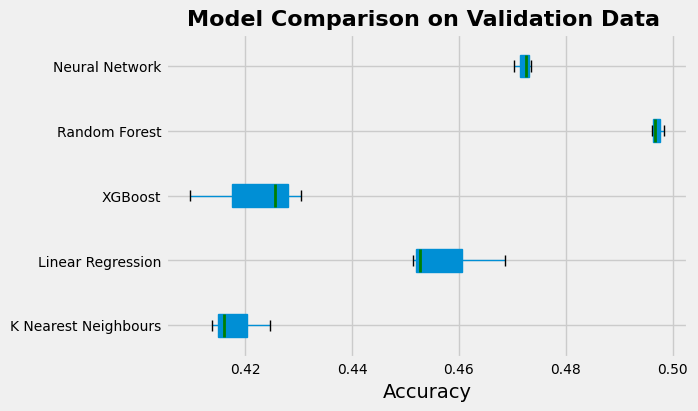

In [ ]:
dft = pd.DataFrame()
dft["K Nearest Neighbours"] = cv_scores_knn
dft["Linear Regression"] = cv_scores_logreg
#dft["Decision Tree"] = cv_scores_tree
dft["XGBoost"] = cv_scores_gb
dft["Random Forest"] = cv_scores_rf
dft["Neural Network"] = cv_scores_nn
plt.figure(figsize=(6,4))
dft.boxplot(showfliers=False, patch_artist=True, medianprops=dict(linestyle='-', linewidth=2, color='green'),
            vert=False, widths=0.35)
ax = plt.gca()
ax.set_xlabel("Accuracy", fontsize=14)
ax.set_title("Model Comparison on Validation Data ", fontsize=16, fontweight="bold")
plt.savefig("model_comparison.png", bbox_inches="tight")

### Plot Precision-Recall and ROC curves for models (Works only for binary classification)

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve

### Turn into binary classifier
y_train_binary = y_train.copy()
y_train_binary[y_train_binary <= 2] = 0
y_train_binary[y_train_binary >= 3] = 1

y_scores_logreg = cross_val_predict(best_logreg, X_train, y_train_binary, cv=3, method="decision_function")
y_scores_gb = cross_val_predict(best_gb, X_train, y_train_binary, cv=3, method="decision_function")

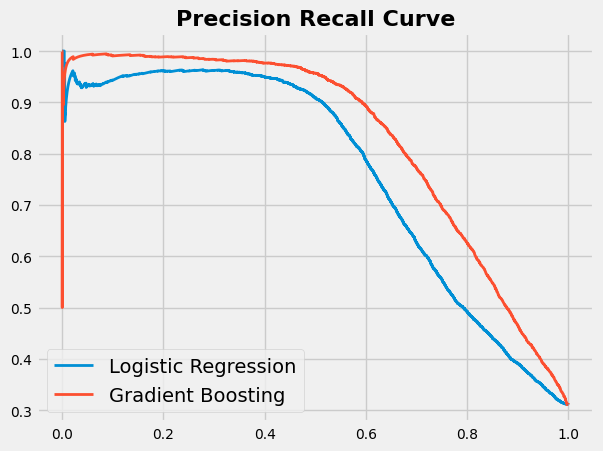

In [ ]:
plt.figure()

precisions, recalls, thresholds = precision_recall_curve(y_train_binary, y_scores_logreg)
plt.plot(recalls, precisions, linewidth=2, label="Logistic Regression")

precisions, recalls, thresholds = precision_recall_curve(y_train_binary, y_scores_gb)
plt.plot(recalls, precisions, linewidth=2, label="Gradient Boosting")

plt.legend(loc="lower left", fontsize=14)
plt.title("Precision Recall Curve", fontsize=16, fontweight="bold")
plt.show()

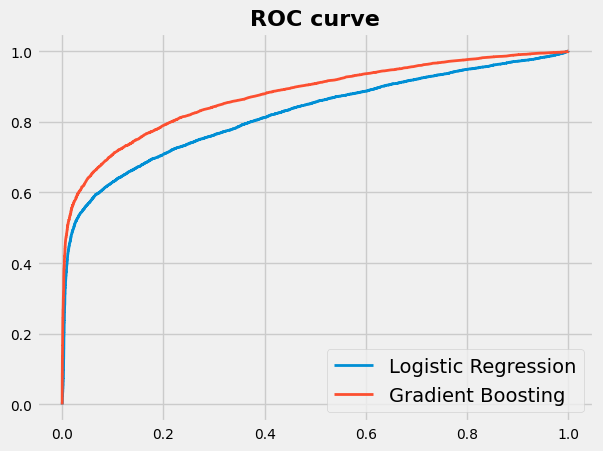

In [ ]:
plt.figure()
fpr, tpr, thresholds = roc_curve(y_train_binary, y_scores_logreg)
plt.plot(fpr, tpr, linewidth=2, label="Logistic Regression")

fpr, tpr, thresholds = roc_curve(y_train_binary, y_scores_gb)
plt.plot(fpr, tpr, linewidth=2, label="Gradient Boosting")

plt.legend(loc="lower right", fontsize=14)
plt.title("ROC curve", fontsize=16, fontweight="bold")
plt.show()

## Saving and loading model

In [ ]:
import joblib

def save_model(save_path, model):
    joblib.dump(model, save_path)

def load_model(load_path):
    my_model_loaded = joblib.load(load_path)
    return my_model_loaded

## Assignment (TODO)

### 1. Using reviews as an indicator of ratings (Better reviews should imply better ratings intuitively). Run Sentiment analysis model on reviews and used that as a feature in ML Models

In [ ]:
!pip install -q transformers
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")
data = ["I love you", "I hate you"]
sentiment_pipeline(data)


dfb.iloc[i]["reviews_list"].split("\'RATED\\n")[1].split("'Rated ")[0].split("')")[0] + "\n")

### 2. Using cuisine and dishes as indicators of price (Restaurants listed as Italian are more likely to have higher price compared to South Indian)

In [ ]:
dfb["dish_liked"]

0        Pasta, Lunch Buffet, Masala Papad, Paneer Laja...
1        Momos, Lunch Buffet, Chocolate Nirvana, Thai G...
2        Churros, Cannelloni, Minestrone Soup, Hot Choc...
3                                              Masala Dosa
4                                      Panipuri, Gol Gappe
                               ...                        
51709                                                  NaN
51711                                 Biryani, Andhra Meal
51712                                                  NaN
51715                         Cocktails, Pizza, Buttermilk
51716                                                  NaN
Name: dish_liked, Length: 41665, dtype: object

In [ ]:
dfb["cuisines"]

0                     North Indian, Mughlai, Chinese
1                        Chinese, North Indian, Thai
2                             Cafe, Mexican, Italian
3                         South Indian, North Indian
4                           North Indian, Rajasthani
                            ...                     
51709                      North Indian, Continental
51711    Andhra, South Indian, Chinese, North Indian
51712                                    Continental
51715                                    Finger Food
51716         Finger Food, North Indian, Continental
Name: cuisines, Length: 41665, dtype: object

### Misc

In [ ]:
"""
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import FunctionTransformer

class DropInvalidRowsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, invalid_tokens=[]):  # no *args or **kwargs!
        self.invalid_tokens = invalid_tokens

    def fit(self, X, y=None):  # y is required even though we don't use it
        if hasattr(X, "columns"):
            self.feature_names_in_ = np.array(X.columns, dtype=object)
        return self  # always return self!

    def transform(self, X):
        #check_is_fitted(self)  # looks for learned attributes (with trailing _)
        #X = check_array(X)
        for col in X.columns:
          X = X[~X[col].isin(self.invalid_tokens)]
        return X

    def get_feature_names_out(self, input_features=None):
        if input_features is None:
            return getattr(self, "feature_names_in_",
                           [f"x{i}" for i in range(self.n_features_in_)])

def get_ratings(X):
    for col in X.columns:
      X[col] = X[col].apply(lambda x: str(x).split("/")[0])
    return X

pipeline_ratings = Pipeline([
    ("get_ratings", FunctionTransformer(get_ratings, feature_names_out="one-to-one")),
    #("drop_invalid_rows", DropInvalidRowsTransformer(invalid_tokens = ["NEW", "-"])),
    ("to_float", FunctionTransformer(lambda x: x.astype(float), feature_names_out="one-to-one")),
])


preprocessing_ratings = ColumnTransformer([
    ("pipeline_ratings", pipeline_ratings, ["ratings"]),
    ], remainder='passthrough')

dfp = pd.DataFrame(preprocessing_ratings.fit_transform(df),
                   #columns=pipeline_ratings[:-1].get_feature_names_out(),
                   )
dfp.head(2)
to_ordinal = Pipeline([
    ("ordinal", OrdinalEncoder()),
])

to_onehot = Pipeline([
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessing = ColumnTransformer([
    ("convert_to_ordinal", to_ordinal, ["online_order", "book_table", "area"]),
    #("convert_to_onehot", to_onehot, ["type"]),
  ], remainder='passthrough',
)
pipeline_preprocessing = make_pipeline(preprocessing)

dfp = pd.DataFrame(pipeline_preprocessing.fit_transform(df),
                   columns=pipeline_preprocessing[:-1].get_feature_names_out(),
                   index=df.index,
                   )
dfp.head(2)
"""